# Промежуточная аттестация по сетям искусcтвенных нейронов.
## Задание

**Ваша задача - создать классификатор изображений с помощью Keras и сверточных нейронных сетей для набора данных Fashion MNIST. Этот набор данных включает 10 меток с разными типами одежды с изображениями 28 на 28 * в оттенках серого *. Имеется обучающий набор из 60 000 изображений и 10 000 тестовых изображений.**

Описание классов

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    


## Данные

**Загружаем данные**

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print('Train: X = ', x_train.shape)
print('Test: X = ', x_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


## Визаулизация датасета

**Используйте matplotlib чтобы показать пример картинки.**

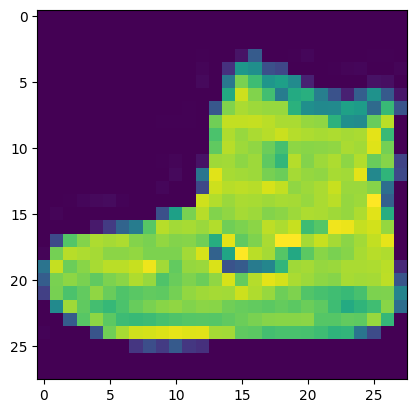

In [ ]:
plt.imshow(x_train[0])

## Предобработка

**Нормализуйте данные X_train и X_test **

In [ ]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print(x_train.shape)


(60000, 28, 28, 1)


**Измените форму массивов X_train и X_test так, чтобы они стали 4-мерными**
batch_size x channels x H x W

**Преобразуйте  y_train и y_test в one_hot представления **

## Создайте модель

**Примерная структура модели. При выполнении задания вы можете поэкспериментировать со слоями**

* Сверточный слой, 32 фильтра, размер ядра=(4,4)
* Пулинг с pool_size = (2,2)

* Выпрямляющий слой (Flatten)
* Полносвязный слой (например 128 нейронов), RELU

* Выходной полносвязный слой с 10 нейронами с softmax

**При компиляции укажите loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [ ]:
def model_arch():
	models = Sequential()

	models.add(Conv2D(32, (4, 4),
					padding="same",
					activation="relu",
					input_shape=(28, 28, 1)))

	models.add(MaxPooling2D(pool_size=(2, 2)))
	models.add(Conv2D(128, (5, 5), padding="same",
					activation="relu"))

	models.add(MaxPooling2D(pool_size=(2, 2)))
	models.add(Conv2D(256, (5, 5), padding="same",
					activation="relu"))

	models.add(MaxPooling2D(pool_size=(2, 2)))

	# are added
	models.add(Flatten())
	models.add(Dense(256, activation="relu"))


	# function
	models.add(Dense(10, activation="softmax"))
	return models


In [ ]:
model = model_arch()

model.compile(optimizer=Adam(learning_rate=1e-3),
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       102528    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 256)         819456    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 256)         0

Тренировка модели


In [ ]:
history = model.fit(
	x_train.astype(np.float32), y_train.astype(np.float32),
	epochs=2,
	steps_per_epoch=20,
	validation_split=0.33
)


Epoch 1/2
20/20 [==============================] - 395s 20s/step - loss: 1.0600 - accuracy: 0.6389 - val_loss: 0.6508 - val_accuracy: 0.7629
Epoch 2/2
20/20 [==============================] - 350s 18s/step - loss: 0.5429 - accuracy: 0.8029 - val_loss: 0.4936 - val_accuracy: 0.8188


### Оценка модели

**Оцените модель по метрикам accuracy,precision,recall,f1-score на тестовой выборке x_test **

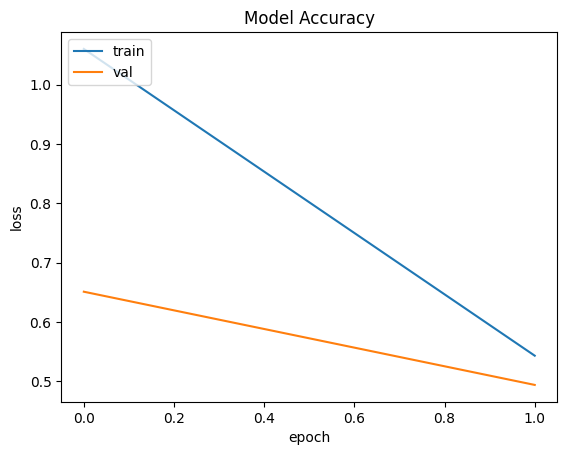

In [ ]:
# Loss vs Epoch plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


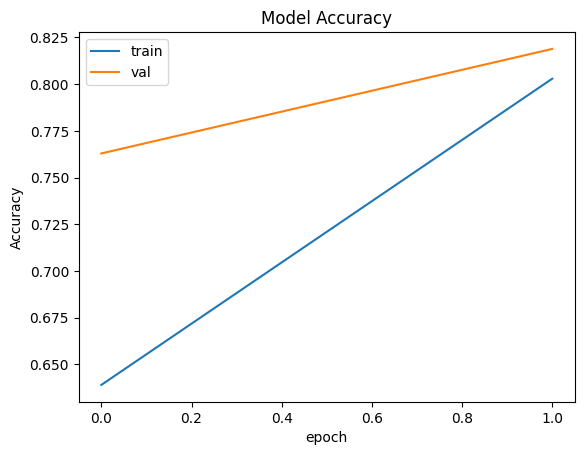

In [ ]:
# Accuracy vs Epoch plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


1/1 [==============================] - 0s 31ms/step
ankle_boots


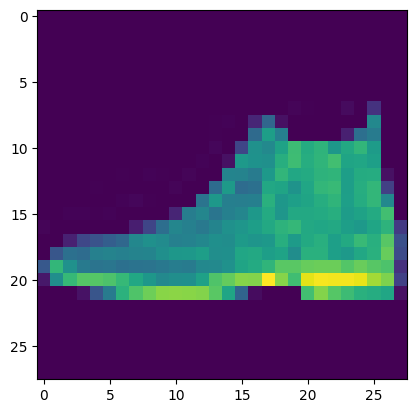

In [ ]:
# There are 10 output labels for the Fashion MNIST dataset
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
		'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
# Make a prediction
predictions = model.predict(x_test[:1])
label = labels[np.argmax(predictions)]

print(label)
plt.imshow(x_test[:1][0])
plt.show()


## Дополнительно

* Отрисуйте фильтры на слое Conv2D, сравните до и после обучения модели